In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d sachchitkunichetty/rvf10k


Dataset URL: https://www.kaggle.com/datasets/sachchitkunichetty/rvf10k
License(s): CC-BY-NC-SA-4.0
 99% 271M/273M [00:04<00:00, 104MB/s]
100% 273M/273M [00:04<00:00, 65.5MB/s]


In [4]:
! unzip rvf10k.zip

Streaming output truncated to the last 5000 lines.
  inflating: rvf10k/train/real/28056.jpg  
  inflating: rvf10k/train/real/28081.jpg  
  inflating: rvf10k/train/real/28160.jpg  
  inflating: rvf10k/train/real/28181.jpg  
  inflating: rvf10k/train/real/28190.jpg  
  inflating: rvf10k/train/real/28192.jpg  
  inflating: rvf10k/train/real/28194.jpg  
  inflating: rvf10k/train/real/28197.jpg  
  inflating: rvf10k/train/real/28199.jpg  
  inflating: rvf10k/train/real/28247.jpg  
  inflating: rvf10k/train/real/28281.jpg  
  inflating: rvf10k/train/real/28308.jpg  
  inflating: rvf10k/train/real/28316.jpg  
  inflating: rvf10k/train/real/28332.jpg  
  inflating: rvf10k/train/real/28342.jpg  
  inflating: rvf10k/train/real/28345.jpg  
  inflating: rvf10k/train/real/28347.jpg  
  inflating: rvf10k/train/real/28392.jpg  
  inflating: rvf10k/train/real/28395.jpg  
  inflating: rvf10k/train/real/28401.jpg  
  inflating: rvf10k/train/real/28412.jpg  
  inflating: rvf10k/train/real/28461.jpg  
  i

In [5]:
# Directories for training, validation, and test datasets
base_path = '/content/rvf10k'


# # ImageDataGenerator without data augmentation
# train_datagen = ImageDataGenerator(rescale=1./255)


# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_path, 'train'),
#     target_size=(299, 299),
#     batch_size=32,
#     class_mode='binary'
# )
# ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,

)

# Data generator for training dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 7000 images belonging to 2 classes.


In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(base_path, 'valid'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [10]:
def build_model():
    # Load the InceptionResNetV2 model with pre-trained weights from ImageNet
    base_model = InceptionResNetV2(weights=None,
        include_top=False, input_shape=(128, 128, 3))


    # Freeze the base model
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])


    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


    return model


In [11]:
# Build and train the model without augmented data
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 2, 2, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1024)              1573888   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 55911649 (213.29 MB)
Trainable params: 1574913 (6.01 MB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [12]:
history = model.fit(
    train_generator,
    # epochs=20,
    epochs=10,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Save the model without augmented data
model.save('/content/drive/MyDrive/Current-DFD-Inception-ResNet-v2/model/second_grade_dummy_model.h5')
model.save('/content/drive/MyDrive/Current-DFD-Inception-ResNet-v2/model/second_grade_dummy_model.keras')



Epoch 1/10
218/218 [==============================] - 130s 546ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6928 - val_accuracy: 0.5003
Epoch 2/10
218/218 [==============================] - 104s 478ms/step - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6927 - val_accuracy: 0.5037
Epoch 3/10
218/218 [==============================] - 104s 476ms/step - loss: 0.6928 - accuracy: 0.5103 - val_loss: 0.6925 - val_accuracy: 0.5017
Epoch 4/10
218/218 [==============================] - 103s 475ms/step - loss: 0.6924 - accuracy: 0.5111 - val_loss: 0.6920 - val_accuracy: 0.5628
Epoch 5/10
218/218 [==============================] - 114s 523ms/step - loss: 0.6918 - accuracy: 0.5329 - val_loss: 0.6917 - val_accuracy: 0.5017
Epoch 6/10
218/218 [==============================] - 115s 526ms/step - loss: 0.6911 - accuracy: 0.5212 - val_loss: 0.6904 - val_accuracy: 0.5585
Epoch 7/10
218/218 [==============================] - 104s 477ms/step - loss: 0.6897 - accuracy: 0.5415 - val_loss: 0.6892 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model.save('/content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned.keras')


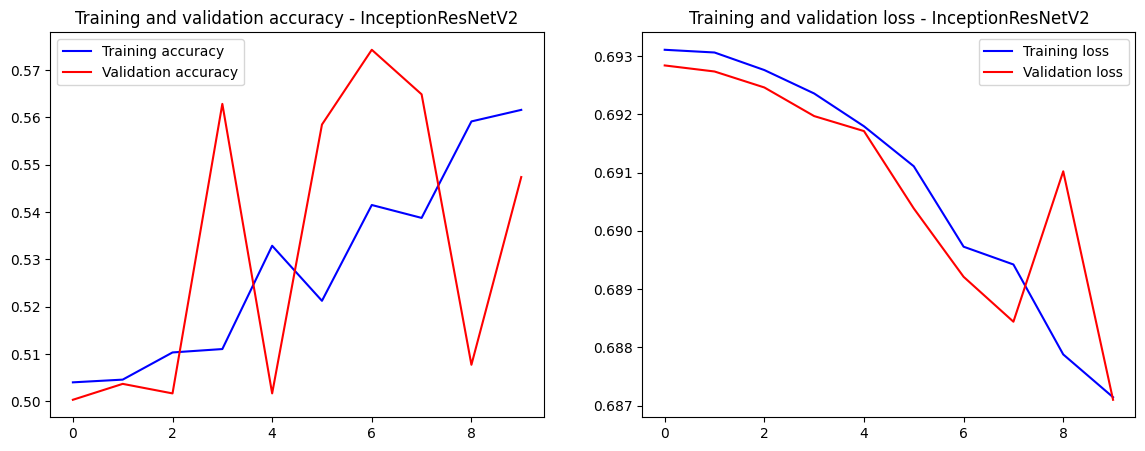

In [23]:
import matplotlib.pyplot as plt

# Function to plot training history


def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy - {title}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss - {title}')
    plt.legend()

    plt.show()


# Build and train the model with augmented data
model_augmented = build_model()


# Plot the training history for the augmented model
plot_history(history, 'InceptionResNetV2')

In [15]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces
# ! kaggle datasets download -d sachchitkunichetty/rvf10k

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [01:01<00:00, 89.3MB/s]
100% 3.75G/3.75G [01:01<00:00, 65.5MB/s]


In [16]:
! unzip 140k-real-and-fake-faces.zip
# ! unzip rvf10k.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [17]:
test_path = '/content/real_vs_fake/real-vs-fake'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(test_path, 'test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [ ]:
# import model from /content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras
model = tf.keras.models.load_model('/content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras')

In [ ]:
# # Evaluate the model without augmented data on the test set
# test_loss_non_aug, test_acc_non_aug = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
# print(f'Test accuracy without data augmentation: {test_acc_non_aug:.2f}')


# Evaluate the model with augmented data on the test set
test_loss_aug, test_acc_aug = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy with data augmentation: {test_acc_aug:.2f}')

93/93 [==============================] - 47s 353ms/step - loss: 0.0916 - accuracy: 0.9667
Test accuracy without data augmentation: 0.97
93/93 [==============================] - 32s 339ms/step - loss: 0.0916 - accuracy: 0.9667
Test accuracy with data augmentation: 0.97


In [18]:
from sklearn import metrics

y_pred = model.predict(test_generator)
y_true = test_generator.classes

625/625 [==============================] - 209s 330ms/step


In [19]:
print("ROC AUC Score:", metrics.roc_auc_score(y_true, y_pred))
print("AP Score:", metrics.average_precision_score(y_true, y_pred))
print()
print(metrics.classification_report(y_true, y_pred > 0.5))

ROC AUC Score: 0.596295295
AP Score: 0.5774747428404869

              precision    recall  f1-score   support

           0       0.62      0.27      0.38     10000
           1       0.53      0.83      0.65     10000

    accuracy                           0.55     20000
   macro avg       0.58      0.55      0.51     20000
weighted avg       0.58      0.55      0.51     20000



<Figure size 800x600 with 0 Axes>

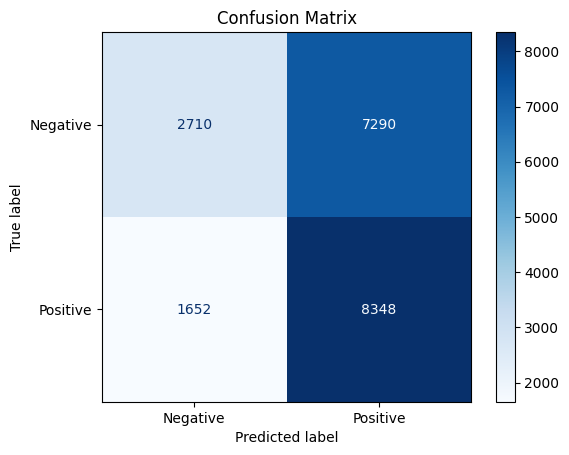

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred > 0.5)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred > 0.5)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2710 7290]
 [1652 8348]]


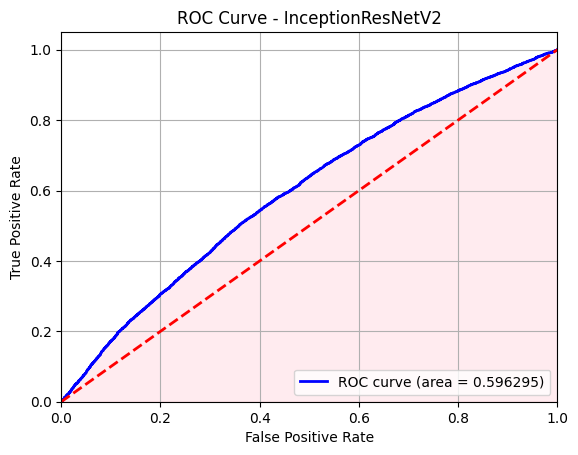

In [24]:

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='blue', lw=lw, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.fill_between(fpr, tpr, color='pink', alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - InceptionResNetV2')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()